# Customer segmentation in *e-commerce*

---

A descriptive analysis will be carried out on the sales of an *e-commerce* company based in the United Kingdom, with data from December 2009 to December 2011. The data comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii). Both customer engagement, based on a cohort analysis, and customer segmentation applying the RFM methodology will be carried out, so that the company can then adopt differentiated strategies for each of the identified segments. It should be noted that the data will be cleaned and processed before analysis.

## Definition of the RFM Methodology

RFM stands for **Recency, Frequency, Monetary Value**. The methodology follows the Pareto principle – 20% of the causes are responsible for 80% of the results.

- **Recency:** how recent the last purchase was in days;
- **Frequency:** how frequent the customer's purchases are - number of transactions;
- **Monetary Value:** how much money customers spend with the companyhow much money customers spend with the company.

In this method, customers are given a score according to these three factors. Each factor is then divided into quintiles, numbered from 1 to 5. The ranking, according to [this Connectif article](https://connectif.ai/en/blog/what-are-rfm-scores-and-how-to-calculate-them/), is as follows:

| Customer Segment | RFM | Behavior | Potential Strategies |
|----------------------|-----|---------------|--------------------------|
| Champion | 555, 554, 544, 545, 454, 455, <br/>445 | They have completed a recent purchase. They <br/>buy frequently and spend the most. | Reward them. They can be the first to adopt <br/>new products. They act as brand <br/>ambassadors. |
| Potential Loyalist | 543, 444, 435, 355, 354, 345, <br/>344, 335 | They buy frequently and spend a lot of <br/>money on the site. Sensitive to offers. | Upsell. Offer high-value items to them. <br/>Ask them for reviews. Build loyalty. |
| Fidelidade em Potencial | 553, 551, 552, 541, 542, 533, <br/>532, 531, 452, 451, 442, 441, <br/>431, 453, 433, 432, 423, 353, <br/>352, 351, 342, 341, 333, 323 | They recently spent a fair <br/>amount of money on the site more <br/>than once. | Invite them to join a loyalty program <br/>or to get a membership. Recommend <br/>other products to them. |
| New Customer | 512, 511, 422, 421, 412, 411, <br/>311 | Completed a recent purchase, but doesn’t <br/>order often. | Support them on their onboarding process. <br/>Get their satisfaction. Start to build loyalty. |
| Promising | 525, 524, 523, 522, 521, 515, <br/>514, 513, 425, 424, 413, 414, <br/>415, 315, 314, 313 | Completed a recent purchase, but didn’t <br/>spend a lot. | Create brand awareness. Offer discounts, <br/>gifts and free trials. |
| Need Attention | 535, 534, 443, 434, 343, 334, <br/>325, 324 | Above average in recency, frequency and <br/>monetary value, but no recent purchases. | Launch limited-time offers and <br/>recommendations based on previous <br/>orders. Reactivate. |
| Cannot Lose Them | 155, 154, 144, 214, 215, 115, <br/>114, 113 | Completed huge, frequent purchases <br/>long ago but haven’t come back <br/>since then. | Get them back with new product launches. <br/>Don’t let competitors take them. Talk to them. |
| About To Sleep | 331, 321, 312, 221, 213 | Below average in recency, frequency and <br/>monetary value. At risk of losing them if <br/>you don’t reactivate. | Share useful information. Recommend popular <br/>products to them. Offer new discounts. Reconnect. |
| At Risk | 255, 254, 245, 244, 253, 252, <br/>243, 242, 235, 234, 225, 224, <br/>153, 152, 145, 143, 142, 135, <br/>134, 133, 125, 124 | Completed big, frequent purchases long <br/>ago. You need to bring them back! | Send personalized emails to reconnect with <br/>special offers. Share useful resources with them. |
| Hibernating | 332, 322, 231, 241, 251, 233, <br/>232, 223, 222, 132, 123, 122, <br/>212, 211. | Their last purchase was long ago. The <br/>number of orders was small and the <br/>amounts spent low. | Offer relevant products and special discounts. <br/>Create brand value again. |
| Lost | 111, 112, 121, 131, 141, 151 | Lowest scores in recency, frequency and <br/>monetary value. | Try to reactivate them with personalized <br/>campaigns. If it doesn’t work, ignore them. |

## Importing the dataset

The data is compressed in zip format, so the first step is to decompress the database.

In [1]:
from zipfile import ZipFile

path = './dados'

zip_file = f'{path}/online+retail+ii.zip'

with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(path)

The dataset is placed in an Excel file, divided into two spreadsheets, entitled “Year 2009-2010” and “Year 2010-2011”. To take all the data from both spreadsheets into account, we will concatenate the two dataframes generated.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import ticker, transforms

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['PT Sans']

In [3]:
xlsx_file = f'{path}/online_retail_ii.xlsx'

xl = pd.ExcelFile(xlsx_file)

df_ecommerce = pd.concat([pd.read_excel(xl, sheet_name=sheet) for sheet in xl.sheet_names])

del xl

## Cleaning and processing the data set

In [4]:
df_ecommerce.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 274.6 MB


There are 824,364 rows with data on 'Customer ID' while there are 1,067,371 rows filled in for the other columns. In other words, **there are 243,007 records where there is no way of identifying the customer**.

#### Important
For the customer cohort analysis, a cohort date is used as the criterion for calculating customer retention. As it is impossible to say whether or not customers with a null ID are the same as those already accounted for on some cohort date, records with a null 'Customer ID' will be removed to avoid this mistake.

In [5]:
df_ecommerce = df_ecommerce.dropna(subset=['Customer ID'])

In [6]:
# Verifying null values
df_ecommerce.isnull().values.any()

False

Now, to prevent duplicate data from interfering with the analysis, possible duplicates will be removed.

In [7]:
# Removing duplicates
df_ecommerce = df_ecommerce.drop_duplicates()

With this resolved, the data types in the first two columns will be standardized.

### Standardization of data types

In [8]:
# Creates a Boolean series indicating whether each column is of a single data type or not
is_not_single_type = (df_ecommerce.dtypes == 'object') & (df_ecommerce.applymap(type).nunique() > 1)

# Applies the result to all columns
multiple_type_cols = [col for col in df_ecommerce.columns if is_not_single_type[col]]
multiple_type_cols

['Invoice', 'StockCode']

From the above check, you can see that the first two columns have two types of data (possibly a mixture of integers and strings). As they are alphanumeric data, they should be transformed into strings. In addition, further up in the column information, you can see that the customer ID is in float.

In [9]:
pd.options.mode.chained_assignment = None

df_ecommerce[['Invoice', 'StockCode', 'Customer ID']] = df_ecommerce[['Invoice', 'StockCode', 'Customer ID']].copy().applymap(str)

### Detection and elimination of returns and reversals

Invoices beginning with the letter "C" correspond to chargebacks. The analysis will take into account the company's **sales**, so chargebacks should be removed.

In [10]:
chargebacks = df_ecommerce['Invoice'].str.startswith('C')
df_ecommerce[chargebacks].shape

(18390, 8)

There are 18,390 chargebacks in the data.

In [11]:
df_ecommerce = df_ecommerce.drop(df_ecommerce[chargebacks].index)

### Total value of the product

The *Price* column represents the unit value of the product. By multiplying it by the quantity in the *Quantity* column, we get the total price.

In [12]:
df_ecommerce['TotalPrice'] = df_ecommerce['Price'] * df_ecommerce['Quantity']

### Consolidation of sales

In [13]:
df_ecommerce['Invoice'].nunique() == df_ecommerce.shape[0]

False

This indicates that the sales data is broken down by product, not by sale (invoice). We must then aggregate this data.

In [14]:
df_ecommerce = (
    df_ecommerce.groupby(['Invoice', 'InvoiceDate', 'Customer ID', 'Country'])['TotalPrice']
        .sum()
        .reset_index()
)

Now we have 36,887 sales in the dataset, an excellent figure for the analysis.

### Zero-value purchases

If there are purchase records with a value of zero, we have to remove them.

In [15]:
df_ecommerce = df_ecommerce.query("TotalPrice >= 0.01")
df_ecommerce.shape

(36881, 5)

The `query` method in pandas allows queries to be made in a way that is very similar to the SQL language for a database. This gives us 36,881 purchase records.

### Sales to an unknown country

There are unspecified countries. They will be removed for analysis.

In [16]:
df_ecommerce = df_ecommerce.query("Country != 'Unspecified'")

df_ecommerce.shape

(36865, 5)

This gives us 36,865 purchase records.

### Treatment

One of the columns — *Customer ID* — has a space in its name, which will be replaced by an underscore (`_`) by code convention.

Also, a "*Year_Month*" column will be added for further grouping and temporal sorting of the data.

In [17]:
df_ecommerce = df_ecommerce.rename(columns={'Customer ID': 'Customer_ID'})

df_ecommerce['Year_Month'] = df_ecommerce['InvoiceDate'].dt.to_period('M')

df_ecommerce = df_ecommerce.sort_values(by=['InvoiceDate'])

## Sales Analysis

Questions to be answered:

- What is the average sale each month?
- How many sales are made each month?
- Which month has the most sales?
- Which customers are the most important?
- How many customers make more than one purchase?
- What is the average amount per purchase?
- How does this information look when considering each country separately?

### Analysis of the amount of purchases per country

Initially, the metrics will be analyzed by aggregating by country, identifying how many purchases originate from each country and the percentage that these purchases represent of the total.

In [18]:
num_sales = df_ecommerce.groupby('Country')['Invoice'].nunique()
perc_sales = (num_sales / df_ecommerce['Invoice'].nunique() * 100).round(3)

df_aggr_countries = pd.concat([num_sales, perc_sales], axis=1)
df_aggr_countries.columns = ['Quantity_Sales', 'Per_Sales']
df_aggr_countries = df_aggr_countries.sort_values('Quantity_Sales', ascending=False)

del num_sales, perc_sales

df_aggr_countries.head(10)

,Quantity_Sales,Per_Sales
Country,,
United Kingdom,33406,90.772
Germany,785,2.133
France,612,1.663
EIRE,565,1.535
Netherlands,227,0.617
Spain,154,0.418
Belgium,147,0.399
Sweden,104,0.283
Australia,94,0.255


 It's clear that the UK accounts for the vast majority of sales, over 90% of the total. This is followed by Germany, France, Ireland¹ and the Netherlands. Rounding off the *top* 10 are Spain, Belgium, Sweden, Australia and Portugal.

 The nine countries between 2nd and 10th place account for around *7.5%** of purchases made. So these 10 just account for **more than 98%** of purchases.

 ¹EIRE (Éire) is Ireland in Irish Gaelic, the country's official (and native) language alongside English.

In [19]:
df_aggr_countries.tail(10).sum()

Quantity_Sales    19.00
Per_Sales          0.05
dtype: float64

On the other hand, the 10 countries with the lowest amount of registered purchases together **account for less than 0.1% of the total**, with less than 50 purchases.

### Analysis of total values by country

The average, median, minimum and maximum values of purchases per country will now be added to the analysis.

The `agg` function allows some statistical calculations to be carried out together, such as count, sum, average, standard deviation (normalized for samples), minimum, maximum, etc.

In [20]:
df_stats = (
    df_ecommerce
        .groupby(['Country', 'Invoice'])['TotalPrice']
        .sum()
        # level=0 selects only the first level when there are multiple indexes
        .groupby(level=0)
        .agg(['mean', 'median', 'min', 'max'])
)
df_aggr_countries = df_aggr_countries.merge(df_stats, left_index=True, right_index=True)

del df_stats

df_aggr_countries['mean'] = df_aggr_countries['mean'].round(2)
df_aggr_countries.columns = df_aggr_countries.columns.str.title()
df_aggr_countries.head(10)

,Quantity_Sales,Per_Sales,Mean,Median,Min,Max
Country,,,,,,
United Kingdom,33406,90.772,423.28,292.995,0.38,168469.60
Germany,785,2.133,528.22,386.400,3.00,6962.20
France,612,1.663,560.54,390.825,4.63,11880.84
EIRE,565,1.535,1077.95,677.620,1.45,44051.60
Netherlands,227,0.617,2390.74,590.000,2.08,20277.92
Spain,154,0.418,693.27,428.690,1.25,4733.52
Belgium,147,0.399,436.31,333.470,8.50,1938.40
Sweden,104,0.283,873.60,466.900,8.50,5296.96
Australia,94,0.255,1795.42,382.700,10.00,22536.71


In [21]:
df_aggr_countries.sort_values('Mean', ascending=False).head(10)

,Quantity_Sales,Per_Sales,Mean,Median,Min,Max
Country,,,,,,
Netherlands,227,0.617,2390.74,590.000,2.08,20277.92
Singapore,11,0.030,2294.11,2053.070,162.60,6068.06
Australia,94,0.255,1795.42,382.700,10.00,22536.71
Lebanon,1,0.003,1626.58,1626.580,1626.58,1626.58
Denmark,43,0.117,1550.56,670.880,30.60,16973.10
Thailand,2,0.005,1526.42,1526.420,1096.00,1956.84
Israel,7,0.019,1487.89,1248.420,15.70,4873.81
Japan,32,0.087,1266.84,274.860,2.95,5735.24
Norway,45,0.122,1242.82,700.000,4.50,6958.17


It can be seen that the countries with the most purchases do not, in general, have such a high average ticket. The only countries that are among those that make the most purchases and also among the destinations with the highest average ticket are the Netherlands, with the fifth-highest share, and the highest average ticket, and Australia, with the ninth-highest share, and the third-highest average ticket.

### Purchases made per month

In [22]:
# Grouping purchases by month and year
df_invoice_month = df_ecommerce.groupby(['Year_Month'])['Invoice'].nunique().reset_index()
df_invoice_month.columns = ['Year_Month', 'Quantity_Sales']
df_invoice_month['Year_Month'] = pd.to_datetime(df_invoice_month['Year_Month'].dt.to_timestamp())

In [23]:
from adjustText import adjust_text
import matplotlib.ticker as mtick

# Auxiliary functions for plots
def make_breaks_yaxis(ax_, values=(.025, .045), d=.015):
    """
    Creates lines signaling a break in the Y axis,
    i.e. when it doesn't start at 0.
    """
    kwargs = {
        'transform': ax.transAxes,
        'color':'k',
        'clip_on':False
    }
    for y_ in values:
        # d is the linewidth
        ax_.plot((-d, d), (y_ - d, y_ + d), **kwargs)

def currency_format(x, pos=None, moeda='£'):
    """
    Formatting monetary values.
    The `pos` argument exists because of the way that
    matplotlib handles the formatting of axis labels
    """
    return f'{moeda}{x:,.2f}'.replace('.', '|').replace(',', '.').replace('|', ',')

# Color definitions for general use in analysis
gray = '#c7c7c7'
blue = '#003153'
red = '#cf0e0e'
dark_red = '#8b0000'
green = '#0b8e37'

palette = [
    '#a6cee3',
    '#1f78b4',
    '#b2df8a',
    '#33a02c',
    '#fb9a99',
    '#e31a1c',
    '#fdbf6f',
    '#ff7f00',
    '#cab2d6',
    '#6a3d9a',
    '#ffff99',
]

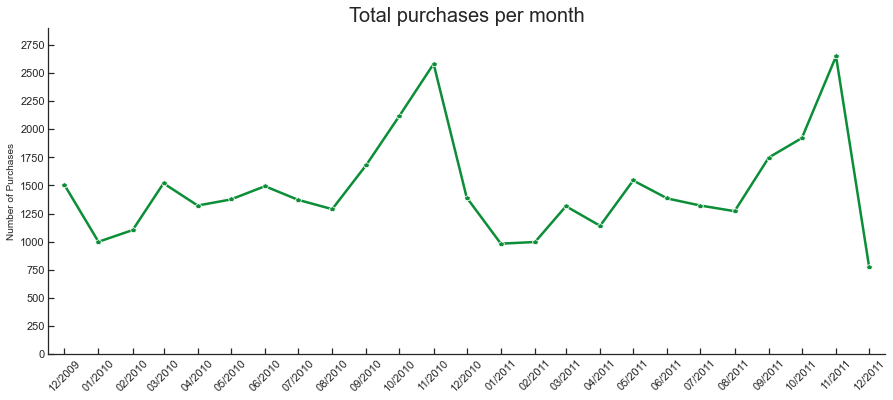

In [24]:
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,6))

ax = sns.lineplot(data=df_invoice_month,
                  x="Year_Month",
                  y="Quantity_Sales",
                  color=green,
                  linewidth=2.5,
                  marker="p")

ax.set_xlabel('')
ax.set_ylabel('Number of Purchases')
ax.set_title('Total purchases per month', fontsize=20)
ax.set_xticks(df_invoice_month['Year_Month'])
ax.set_xticklabels(labels=df_invoice_month['Year_Month'].dt.strftime('%m/%Y'),
                   rotation=45)
ax.set_ylim(0, 2900)
ax.set_yticks([i for i in range(0, 2800, 250)])
ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False)

plt.margins(x=.02, y=0)
sns.despine()

plt.show()

### Sales comparison: UK *versus* rest of the world month by month

The Channel Islands (also called *Îles Anglo-Normandes* or *Îles de la Manche*) are a group of islands in the English Channel, which form two of the three dependencies of the British Crown: the bailiwicks of Guernsey and Jersey, with the third dependency being the Isle of Man, in the Irish Sea. The dependencies are not part of the United Kingdom *per se*, although they are territories owned by the British crown. Despite their great autonomy, the United Kingdom is politically and geopolitically  responsible for them. They are a category of their own, with clear distinctions from the British Overseas Territories and the countries that belong to the Commonwealth of Nations, of which the crown dependencies do not have membership.

This is important because, despite having great autonomy, it makes perfect sense for sales to the Channel Islands be included alongside the United Kingdom, and not considered as “rest of the world”.

In [25]:
is_uk = lambda country: 'United Kingdom' if country in ['United Kingdom', 'Channel Islands'] else 'Rest of the World'
df_ecommerce['Region'] = df_ecommerce['Country'].apply(is_uk)

df_comp_region = (
    df_ecommerce
        .groupby(['Year_Month', 'Region'])
        .agg({
            'Invoice': 'nunique',
            'TotalPrice': 'sum'
        })
        .reset_index()
        .rename(columns={
            'Invoice': 'Quantity_Sales',
            'TotalPrice': 'Turnover'
        })
)

df_comp_region['Year_Month'] = pd.to_datetime(df_comp_region['Year_Month'].dt.to_timestamp())

df_comp_region

,Year_Month,Region,Quantity_Sales,Turnover
0,2009-12-01,Rest of the World,81,66917.060
1,2009-12-01,United Kingdom,1426,603420.540
2,2010-01-01,Rest of the World,102,137215.570
3,2010-01-01,United Kingdom,897,403532.992
4,2010-02-01,Rest of the World,103,94827.100
5,2010-02-01,United Kingdom,1000,405090.656
6,2010-03-01,Rest of the World,127,107396.760
7,2010-03-01,United Kingdom,1392,576494.341
8,2010-04-01,Rest of the World,104,87371.201
9,2010-04-01,United Kingdom,1217,493871.431


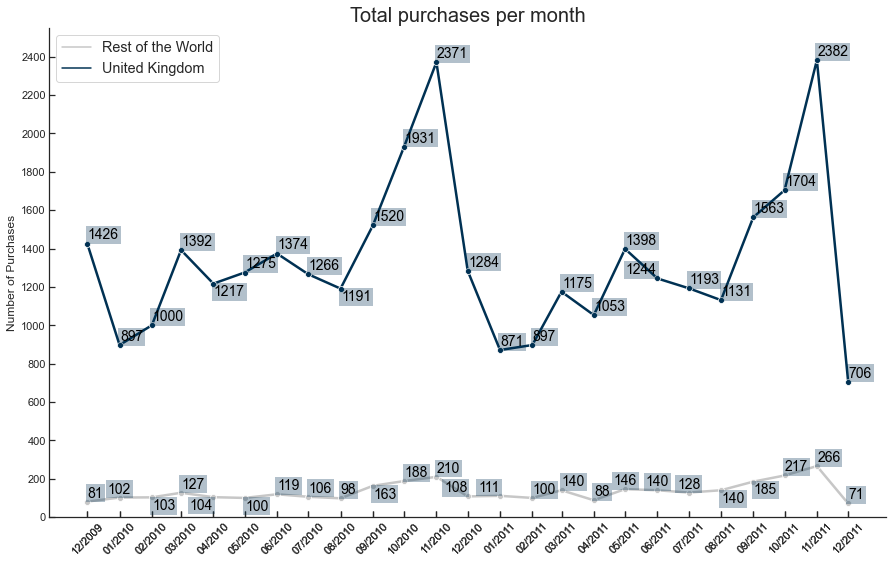

In [26]:
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,9))

ax = sns.lineplot(data=df_comp_region,
                  x="Year_Month",
                  y="Quantity_Sales",
                  hue='Region',
                  legend=True,
                  palette=[gray, blue],
                  linewidth=2.5,
                  marker="o")

ax.set_xlabel('')
ax.set_ylabel('Number of Purchases')
ax.set_title('Total purchases per month', fontsize=20)
ax.set_xticks(df_comp_region['Year_Month'])
ax.set_xticklabels(labels=df_comp_region['Year_Month'].dt.strftime('%m/%Y'),
                   rotation=45)
ax.set_yticks([i for i in range(0, 2600, 200)])
ax.set_ylim((0, 2550))
ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False)
plt.margins(x=.05, y=0)
sns.despine()

plt.legend(title='', fontsize='large', loc=2)

texts = []
for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        label = f'{y_value}'
        bg_color = gray if line.get_label() == '_child0' else blue
        annotation = ax.annotate(label, (x_value, y_value),
                                 xytext=(0, 0),
                                 textcoords="offset points",
                                 fontsize=14, color='black',
                                 ha='center', va='top',
                                 bbox={
                                     'facecolor': '#003153',
                                     'edgecolor': 'none',
                                     'pad': 2,
                                     'alpha': 0.3
                                 })
        texts.append(annotation)

adjust_text(texts)

plt.show()

The two peaks in the graph are the months of November, probably driven by events such as Black Friday and the arrival of Christmas and other end-of-year celebrations.

### New customers per month

In [27]:
seen_customers = set()
def count_new_customers(customers):
    global seen_customers
    new_customers = len(set(customers) - seen_customers)
    seen_customers.update(customers)
    return new_customers

df_new_customers = (
    df_ecommerce
        .groupby('Year_Month')['Customer_ID']
        .apply(count_new_customers)
        .reset_index()
        .rename(columns={'Customer_ID': 'New_Customers'})
)

df_new_customers['Year_Month'] = pd.to_datetime(df_new_customers['Year_Month'].dt.to_timestamp())

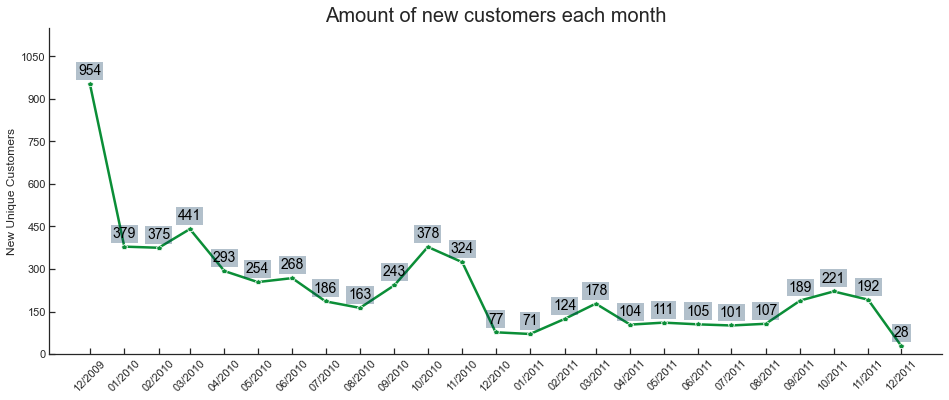

In [28]:
plt.figure(figsize=(16, 6))

ax = sns.lineplot(data=df_new_customers,
                  x='Year_Month',
                  y='New_Customers',
                  color=green,
                  linewidth=2.5,
                  marker='p')

ax.set_xlabel('')
ax.set_ylabel('New Unique Customers')
ax.set_title('Amount of new customers each month', fontsize=20)
ax.set_xticks(df_new_customers['Year_Month'])
ax.set_xticklabels(labels=df_new_customers['Year_Month'].dt.strftime('%m/%Y'),
                   rotation=45)
ax.set_yticks([i for i in range(0, 1100, 150)])
ax.set_ylim((0, 1150))
ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False)
plt.margins(x=.05, y=0)
sns.despine()

for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        label = f'{y_value}'
        ax.annotate(label,(x_value, y_value),
                    xytext=(0, 20),
                    textcoords="offset points",
                    fontsize=14, color='black',
                    ha='center', va='top',
                    bbox={
                        'facecolor': '#003153',
                        'edgecolor': 'none',
                        'pad': 2,
                        'alpha': 0.3
                    })

plt.show()

You can see that, over time, the company has grown steadily, with peaks around October.

#### But what was the proportional growth?

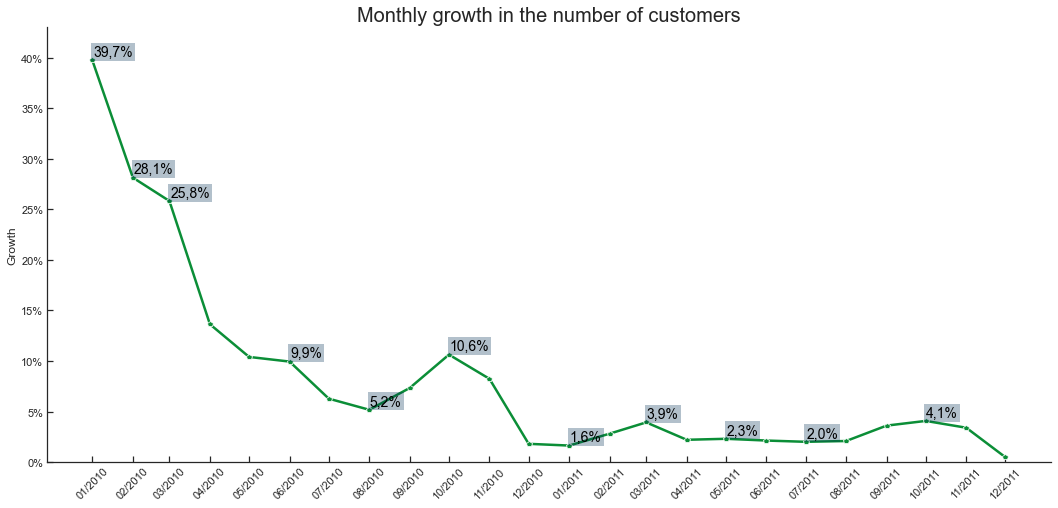

In [29]:
df_new_customers['Customers_Accum'] = df_new_customers['New_Customers'].cumsum()
df_new_customers['Growth'] = df_new_customers['Customers_Accum'].pct_change().fillna(0) * 100

plt.figure(figsize=(18, 8))

ax = sns.lineplot(data=df_new_customers.loc[1:, :],
                  x='Year_Month',
                  y='Growth',
                  color=green,
                  linewidth=2.5,
                  marker='p')

ax.set_xlabel('')
ax.set_ylabel('Growth')
ax.set_title('Monthly growth in the number of customers', fontsize=20)
ax.set_xticks(df_new_customers['Year_Month'][1:])
ax.set_xticklabels(labels=df_new_customers['Year_Month'].dt.strftime('%m/%Y')[1:],
                   rotation=45)
ax.set_ylim((0, 43))
ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False)

plt.margins(x=.05, y=0)
sns.despine()

texts = []

for line in ax.lines:
    for i, (x_value, y_value) in enumerate(zip(line.get_xdata(), line.get_ydata())):
        # I just want the labels of specific points
        if i in (0, 1, 2, 5, 7, 9, 12, 16, 14, 18, 21):
            label = f'{y_value:.1f}%'.replace('.', ',')
            annotation = ax.annotate(label,(x_value, y_value),
                                     xytext=(0, 0),
                                     textcoords="offset points",
                                     fontsize=14, color='black',
                                     ha='center', va='top',
                                     bbox={
                                         'facecolor': '#003153',
                                         'edgecolor': 'none',
                                         'pad': 2,
                                         'alpha': 0.3
                                     })
            texts.append(annotation)

adjust_text(texts)

fmt = lambda x, pos: '{:.0f}%'.format(x)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(fmt))

plt.show()

It's clear that proportional growth has declined over time, but this isn't necessarily a problem. It depends on the future plans of the business leaders, and also how many customers are still loyal to the company.

### Number of Customers Buying Each Month

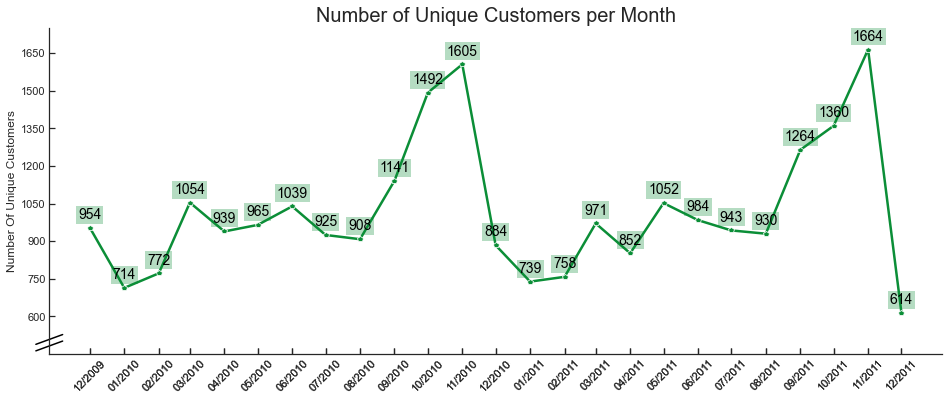

In [30]:
df_unique_customers = (
    df_ecommerce
    .groupby('Year_Month')['Customer_ID']
    .nunique()
    .reset_index()
    .rename(columns={'Customer_ID': 'Unique_Customers'})
)

df_unique_customers['Year_Month'] = pd.to_datetime(df_unique_customers['Year_Month'].dt.to_timestamp())

plt.figure(figsize=(16, 6))

ax = sns.lineplot(data=df_unique_customers,
                  x='Year_Month',
                  y='Unique_Customers',
                  color=green,
                  linewidth=2.5,
                  marker='p')

ax.set_xlabel('')
ax.set_ylabel('Number Of Unique Customers')
ax.set_title('Number of Unique Customers per Month', fontsize=20)
ax.set_xticks(df_comp_region['Year_Month'])
ax.set_xticklabels(labels=df_comp_region['Year_Month'].dt.strftime('%m/%Y'),
                   rotation=45)
ax.set_yticks([i for i in range(600, 1800, 150)])
ax.set_ylim((450, 1750))
ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False)
plt.margins(x=.05, y=0)
sns.despine()

for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        label = f'{y_value}'
        ax.annotate(label,(x_value, y_value), xytext=(0, 20),
                    textcoords="offset points",
                    fontsize=14, color='black',
                    ha='center', va='top',
                    bbox={
                        'facecolor': green,
                        'edgecolor': 'none',
                        'pad': 2,
                        'alpha': 0.3
                    })

make_breaks_yaxis(ax)

plt.show()

The months with the highest number of different customers buying are November, the sames months with the most purchases made.

### Monthly value sold

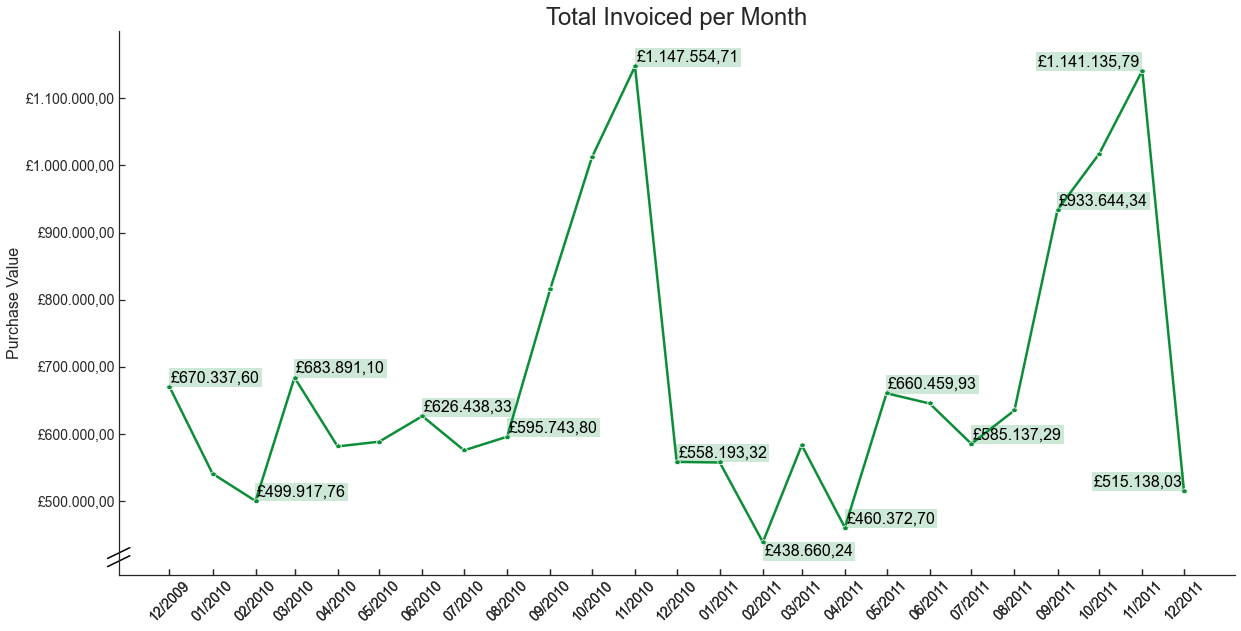

In [31]:
df_sales = (
    df_ecommerce
    .groupby('Year_Month')['TotalPrice']
    .sum()
    .reset_index()
)

df_sales['Year_Month'] = pd.to_datetime(df_sales['Year_Month'].dt.to_timestamp())

plt.figure(figsize=(20, 10))

ax = sns.lineplot(data=df_sales,
                  x='Year_Month',
                  y='TotalPrice',
                  color=green,
                  linewidth=2.5,
                  marker='p')

ax.set_xlabel('')
ax.set_ylabel('Purchase Value', fontsize=16)

ax.set_xticks(df_comp_region['Year_Month'])
ax.set_xticklabels(labels=df_comp_region['Year_Month'].dt.strftime('%m/%Y'),
                   rotation=45)
ax.set_yticks([i for i in range(500_000, 1_200_000, 100_000)])
ax.set_ylim((390_000, 1_200_000))

ax.tick_params(axis='both', which='both', direction='in',
               left=True, bottom=True, right=False, top=False,
               labelsize=14)

ax.set_title('Total Invoiced per Month', fontsize=24)
plt.margins(x=.05, y=0)
sns.despine()

texts = []
for line in ax.lines:
    for i, (x_value, y_value) in enumerate(zip(line.get_xdata(), line.get_ydata())):
        if i in (0, 2, 3, 6, 8, 11, 12, 14, 16, 17, 19, 21, 23, 24):
            label = currency_format(y_value)
            annotation = ax.annotate(label,
                                     (x_value, y_value),
                                     xytext=(0, 0),
                                     textcoords="offset points",
                                     fontsize=16,
                                     color='black',
                                     ha='center',
                                     va='top',
                                     bbox={
                                         'facecolor': '#0b8e37',
                                         'edgecolor': 'none',
                                         'pad': 2,
                                         'alpha': 0.2
                                     })
            texts.append(annotation)

adjust_text(texts)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(currency_format))

make_breaks_yaxis(ax, d=.01, values=(.025, .04))

plt.show()

It is very noticeable that sales are concentrated in the second half of each year, especially between September and October.

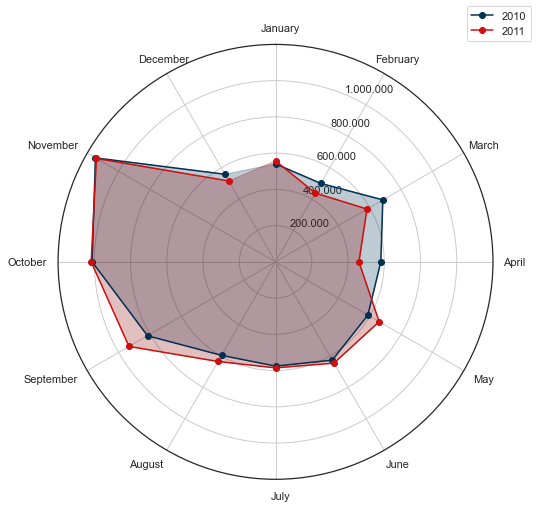

In [33]:
df_compare = df_sales.groupby('Year_Month')['TotalPrice'].sum().reset_index()

meses = (
    df_compare[df_compare['Year_Month'].dt.year == 2010]['Year_Month']
        .dt.month_name('English')
        .to_numpy()
)

ano_2010 = df_compare[df_compare['Year_Month'].dt.year == 2010]['TotalPrice'].to_numpy()
ano_2011 = df_compare[df_compare['Year_Month'].dt.year == 2011]['TotalPrice'].to_numpy()
theta = np.linspace(0, 2*np.pi, 12, endpoint=False)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

ax.plot(theta, ano_2010, marker='o', label='2010', color=blue)
ax.fill(theta, ano_2010, alpha=0.25, color=blue)
ax.plot(theta, ano_2011, marker='o', label='2011', color=red)
ax.fill(theta, ano_2011, alpha=0.25, color=dark_red)

# Extra configs
ax.grid(True)
ax.set_theta_offset(np.pi / 2)  # Adjusts zero to the top
ax.set_theta_direction(-1)  # Adjusts direction to the right
ax.set_xticks(theta)
ax.set_xticklabels(meses)
ax.set_yticks([i * 10_000 for i in range(20, 105, 20)])
ax.set_yticklabels(['200.000', '400.000', '600.000', '800.000', '1.000.000'])
ax.set_ylim(0, 1_200_000)

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

aligns = ['center'] * 7 + ['right'] * 4 + ['center']
for tick, align in zip(ax.get_xticklabels(), aligns):
    tick.set_ha(align)

dx = 5/72.
dy = 0/72.
offset = transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# Apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

In this circle view (or in polar coordinates, technically speaking), the comparison of sales between the same months of the two years, 2010 and 2011, is easier. In all, in only five months did 2011 have a lower amount of sales: February, March, April, November and December, with the most noticeable difference in the months of February to April, with almost 120,000 pounds less in sales in 2011, a drop of around 20%.

## Cohort Analysis

A cohort, in statistics, is a group of people with a common event that happened in the same period. For example, a cohort of those born in the same year and when and why they die is used to calculate life expectancy at birth.

Evaluating groups of customers with shared characteristics helps to plan the strategies to be implemented. For example, customers with the same purchase date are classified in the same cohort.

To do this, customers will be organized into first purchase date groups and the behavior of the groups will be analyzed using metrics such as **customer retention**.

In [34]:
def cohort_period(df):
    """
    Function to assign the periods of each cohort
    """
    df['Time_Period'] = np.arange(len(df)) + 1
    return df


df_cohort = (
    df_ecommerce
    .groupby(['Year_Month', 'Customer_ID', 'Invoice'])
    .agg({'TotalPrice': np.sum})
    .reset_index()
    .set_index('Customer_ID')
    .assign(Cohort = df_ecommerce.groupby('Customer_ID')['Year_Month'].min())
    .reset_index()
    .groupby(['Cohort', 'Year_Month'])
    .agg({'Customer_ID': pd.Series.nunique,
          'Invoice': pd.Series.nunique,
          'TotalPrice': np.sum})
    .rename(columns={'Customer_ID': 'Total_Customers',
                     'Invoice': 'Total_Invoiced'})
    .groupby(level=0, group_keys=False)
    .apply(cohort_period)
    .reset_index()
    .set_index(['Cohort', 'Time_Period'])
)


cohorts = df_cohort['Total_Customers'].groupby(level=0).first()
retained_customers = df_cohort['Total_Customers'].unstack(0).divide(cohorts, axis=1)

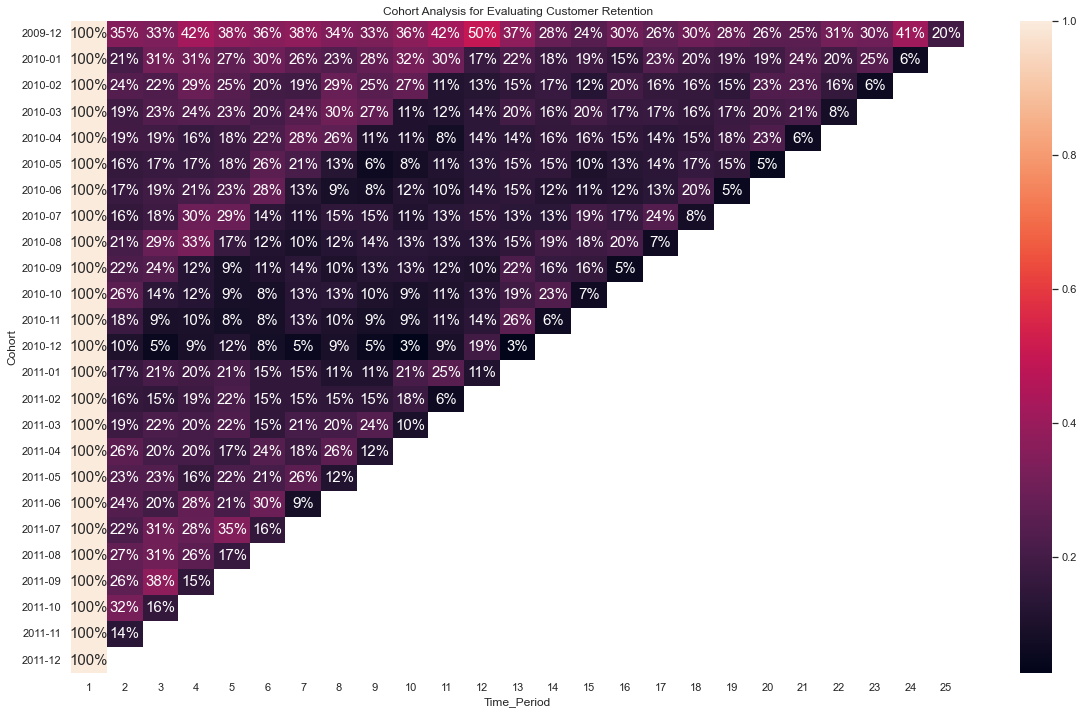

In [35]:
plt.figure(figsize=(20,12))
plt.title('Cohort Analysis for Evaluating Customer Retention')
sns.heatmap(retained_customers.T,
            mask=retained_customers.T.isnull(),
            annot=True,
            fmt='.0%',
            annot_kws={"size": 15},
            cmap = 'rocket')
plt.show()

It is noticeable that there is a return of customers in the November period, creating a diagonal of the November months, with a large drop afterwards. The reasons for this should be investigated further.

## Customer segmentation using RFM

After categorizing and classifying each customer by the results obtained, it is possible to determine which type of segment each customer will be added to, and then which strategies to apply to each grouping of customers.

### Preparing a new data set for customer segmentation

In [36]:
df_customers = (
    df_ecommerce.groupby('Customer_ID')
    .agg({
        'Country': 'first',
        'InvoiceDate': 'max',
        'Invoice': 'nunique',
        'TotalPrice': 'sum'
    })
    .reset_index()
)

df_customers['Region'] = df_customers['Country'].apply(is_uk)
df_customers['Recency'] = (df_customers['InvoiceDate'].max() - df_customers['InvoiceDate']).dt.days
df_customers.columns = ['Customer_ID', 'Country', 'Date_Last_Purchase', 'Frequency', 'Monetary', 'Region', 'Recency']

df_customers

,Customer_ID,Country,Date_Last_Purchase,Frequency,Monetary,Region,Recency
0,12346.0,United Kingdom,2011-01-18 10:01:00,12,77556.46,United Kingdom,325
1,12347.0,Iceland,2011-12-07 15:52:00,8,4746.73,Rest of the World,1
2,12348.0,Finland,2011-09-25 13:13:00,5,1979.40,Rest of the World,74
3,12349.0,Italy,2011-11-21 09:51:00,4,4380.81,Rest of the World,18
4,12350.0,Norway,2011-02-02 16:01:00,1,291.80,Rest of the World,309
...,...,...,...,...,...,...,...
5861,18283.0,United Kingdom,2011-12-06 12:02:00,22,2617.24,United Kingdom,3
5862,18284.0,United Kingdom,2010-10-04 11:33:00,1,461.68,United Kingdom,431
5863,18285.0,United Kingdom,2010-02-17 10:24:00,1,427.00,United Kingdom,660
5864,18286.0,United Kingdom,2010-08-20 11:57:00,2,1296.43,United Kingdom,476


### Creation of quintiles for customer classification

In [37]:
df_customers[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,5866.000000,5866.000000,5866.000000
mean,200.456529,6.273781,2909.649359
std,209.456884,12.951982,14269.024035
min,0.000000,1.000000,2.950000
25%,25.000000,1.000000,337.355000
50%,95.000000,3.000000,856.020000
75%,379.000000,7.000000,2216.200000
max,738.000000,397.000000,578856.480000


In [38]:
df_customers['m_quartil'] = pd.qcut(df_customers['Monetary'], labels=['1', '2', '3', '4', '5'], q=5)

# Labels inverted because the shorter the recency, the better
df_customers['r_quartil'] = pd.qcut(df_customers['Recency'], labels=['5', '4', '3', '2', '1'], q=5)

# The range if different because there are many repeated frequency values, which break the method
df_customers['f_quartil'] = pd.qcut(df_customers['Frequency'], labels=['1', '2', '3', '4', '5'], q=[0, .278, .438, .6, .8, 1])

df_customers['RFM'] = df_customers['r_quartil'].astype(str) + \
                      df_customers['f_quartil'].astype(str) + \
                      df_customers['m_quartil'].astype(str)
df_customers

,Customer_ID,Country,Date_Last_Purchase,Frequency,Monetary,Region,Recency,m_quartil,r_quartil,f_quartil,RFM
0,12346.0,United Kingdom,2011-01-18 10:01:00,12,77556.46,United Kingdom,325,5,2,5,255
1,12347.0,Iceland,2011-12-07 15:52:00,8,4746.73,Rest of the World,1,5,5,4,545
2,12348.0,Finland,2011-09-25 13:13:00,5,1979.40,Rest of the World,74,4,3,4,344
3,12349.0,Italy,2011-11-21 09:51:00,4,4380.81,Rest of the World,18,5,5,3,535
4,12350.0,Norway,2011-02-02 16:01:00,1,291.80,Rest of the World,309,2,2,1,212
...,...,...,...,...,...,...,...,...,...,...,...
5861,18283.0,United Kingdom,2011-12-06 12:02:00,22,2617.24,United Kingdom,3,4,5,5,554
5862,18284.0,United Kingdom,2010-10-04 11:33:00,1,461.68,United Kingdom,431,2,1,1,112
5863,18285.0,United Kingdom,2010-02-17 10:24:00,1,427.00,United Kingdom,660,2,1,1,112
5864,18286.0,United Kingdom,2010-08-20 11:57:00,2,1296.43,United Kingdom,476,4,1,1,114


### Categorization of customer segments according to RFM generated

In [39]:
rfm_to_category = {
    'Champion': ['555', '554', '544', '545', '454', '455', '445'],
    'Loyal Customer': ['543', '444', '435', '355', '354', '345', '344', '335'],
    'Potential Loyalist': ['553', '551', '552', '541', '542', '533', '532', '531',
                           '452', '451', '442', '441', '431', '453', '433', '432',
                           '423', '353', '352', '351', '342', '341', '333', '323'],
    'New Customer': ['512', '511', '422', '421', '412', '411', '311'],
    'Promising': ['525', '524', '523', '522', '521', '515', '514', '513',
                  '425', '424', '413', '414', '415', '315', '314', '313'],
    'Need Attention': ['535', '534', '443', '434', '343', '334', '325', '324'],
    'Cannot Lose Them': ['155', '154', '144', '214', '215', '115', '114', '113'],
    'About To Sleep': ['331', '321', '312', '221', '213'],
    'At Risk': ['255', '254', '245', '244', '253', '252', '243', '242',
                '235', '234', '225', '224', '153', '152', '145', '143',
                '142', '135', '134', '133', '125', '124'],
    'Hibernating': ['332', '322', '231', '241', '251', '233', '232',
                    '223', '222', '132', '123', '122', '212', '211'],
    'Lost': ['111', '112', '121', '131', '141', '151']
}

def get_category(rfm):
    """Function to get the category based on the RFM code"""
    for category, values in rfm_to_category.items():
        if rfm in values:
            return category
    return None

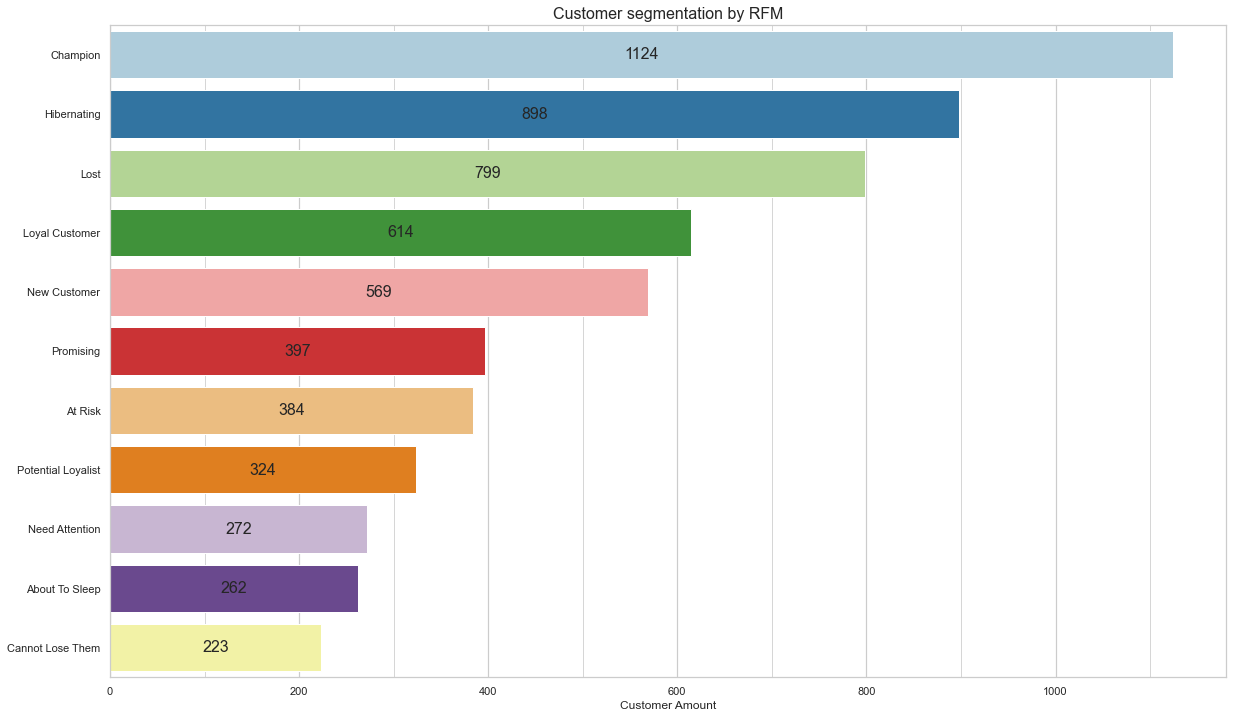

In [40]:
df_customers['Category'] = df_customers['RFM'].apply(get_category)

df_data = (
    df_customers.groupby('Category')['Category']
        .count()
        .rename('Count')
        .reset_index()
        .sort_values(by='Count', ascending=False)
)

plt.figure(figsize=(20,12))

sns.set_style("whitegrid")
ax = sns.barplot(x='Count', y='Category', data=df_data, palette=palette)

plt.xlabel('Customer Amount')
plt.ylabel('')
plt.title('Customer segmentation by RFM', {'fontsize': 16})
plt.bar_label(ax.containers[0], size=16, label_type='center')

ax.xaxis.grid(which='major', color='#CCCCCC', linewidth=1.2)
ax.xaxis.grid(which='minor', color='#CCCCCC', linewidth=0.8)
ax.minorticks_on()

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))

plt.show()

Looking at the results, we can highlight some important findings. Firstly, the category with the highest number of customers is "Champions", which represents an impressive total of 1124 customers, equivalent to around 19% of all customers. These customers are highly valuable, demonstrating exceptional recency, frequency and monetary value in their interactions with the company. It is essential to maintain a solid relationship with this group and continue to offer services and products that meet their needs.

However, there are two categories that deserve special attention from the company. The first of these is "Hibernating", with 898 customers, which represents around 15% of the total. Although they may have shown some interest in the past, these customers are now less engaged and represent a yellow light. It is important to create strategies to reactivate the interest of these customers and bring them back into engagement with the company.

The second critical category is "Lost", made up of 799 customers, which is approximately 13% of the total. These customers are in a state of prolonged inactivity and represent a significant lost opportunity. It is essential to assess the reason for these customers' inactivity and create effective plans to win them back, offering incentives and personalized solutions.

The "Loyal Customers" category, with 614 customers, corresponds to around 10% of the total. This is a category worth highlighting due to its significant size. These customers demonstrate good recency, frequency and monetary value in their previous transactions, indicating a stable relationship with the company. Maintaining and strengthening this connection is crucial to ensuring that they remain loyal customers. Loyalty strategies, such as reward programs and personalized communication, can be highly effective in further enhancing the relationship with this group.

The "New Customers" category, with 569 customers, represents approximately 9.7% of the total. These customers are a promising growth opportunity for the company. Although they represent a smaller share than "Champions" or "Loyal Customers", they show a recent interest in products or services. It is essential to dedicate efforts to nurturing these new relationships, providing a positive experience from the outset. Offering welcome incentives and ensuring exceptional service can help solidify these customers as a key part of the company's customer base.

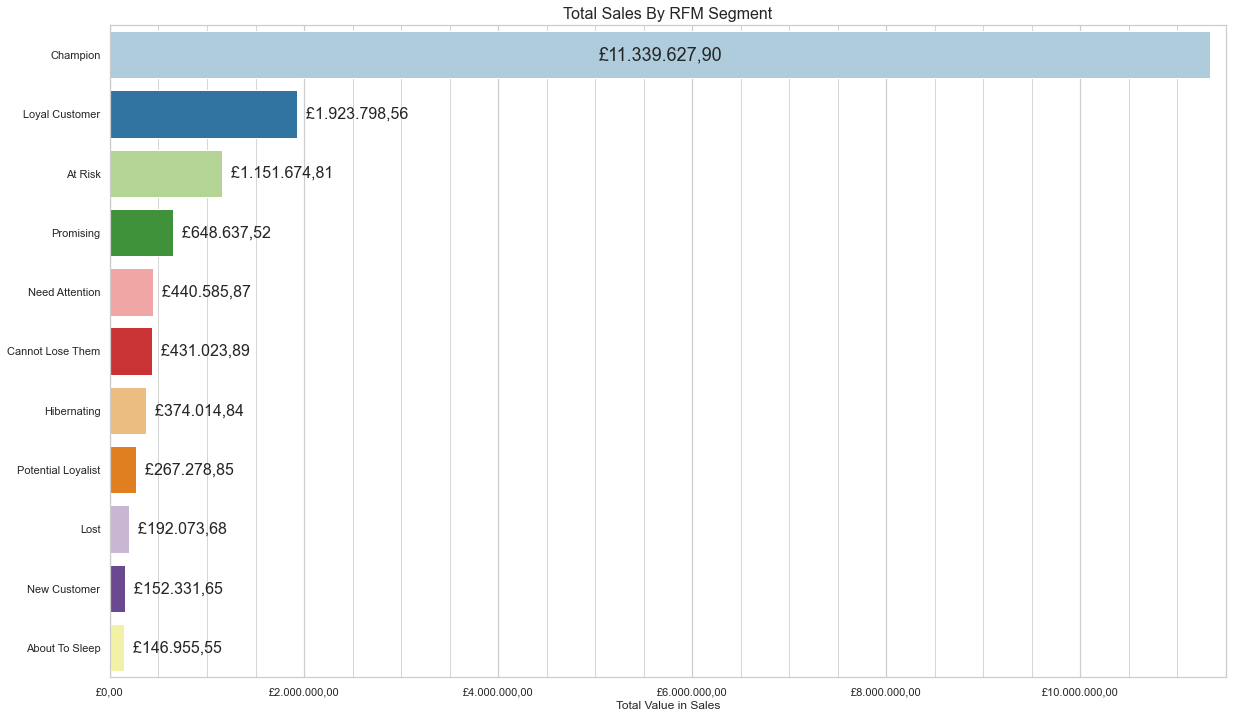

In [41]:
df_sales = (
    df_customers.groupby('Category')['Monetary']
        .sum()
        .sort_values(ascending=False)
        .reset_index()
)

plt.figure(figsize=(20,12))

sns.set_style("whitegrid")
ax = sns.barplot(x='Monetary', y='Category', data=df_sales, palette=palette)

plt.xlabel('Total Value in Sales')
plt.ylabel('')
plt.title('Total Sales By RFM Segment', {'fontsize': 16})

sales = df_sales['Monetary']
center_label = [currency_format(val) if val == max(sales) else '' for val in sales]
edge_label = [f'  {currency_format(val)}' if val != max(sales) else '' for val in sales]

plt.bar_label(ax.containers[0],
              labels=center_label,
              label_type='center',
              size=18)

plt.bar_label(ax.containers[0],
              labels=edge_label,
              label_type='edge',
              size=16)

ax.set_xlim(0, 11_500_000)
ax.set_xticks([i * 1_000_000 for i in range(0, 11, 2)])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.xaxis.set_major_formatter(mtick.FuncFormatter(currency_format))

ax.xaxis.grid(which='major', color='#CCCCCC', linewidth=1.2)
ax.xaxis.grid(which='minor', color='#CCCCCC', linewidth=0.8)
ax.minorticks_on()

plt.show()

In the time period of this analysis, customers classified as “Champions” accounted for most of the company’s financial success, contributing a total sales value of over 11 million pounds. This figure represents approximately 66% of total revenues in the period, just over 17 million pounds. The “Champions” have demonstrated their loyalty and continued value over time, playing a key role in the company's growth and financial stability.

In [42]:
loyalists = df_sales.query("Category == 'Loyal Customer'")['Monetary']
currency_format(loyalists.values[0]), round((loyalists / sales.sum() * 100).values[0], 2)

('£1.923.798,56', 11.27)

The Loyal Customers also played an important role in the company’s sales, contributing around 11% of total sales, which represents almost 2 million pounds. These customers have demonstrated a solid, long-term relationship with the company, making purchases consistently. Their continued support is invaluable and highlights the importance of cultivating lasting relationships with customers to ensure long-term success.

## Análise dos Dados Segmentados por RFM

In [43]:
df_customers['Category'] = df_customers['RFM'].apply(get_category)

df_sales_region = (
    df_customers.groupby(['Category', 'Region'])['Monetary']
        .sum()
        .reset_index()
)

ordered_categories = df_sales.sort_values(by='Monetary', ascending=False)['Category'].tolist()

df_sales_region['Ordered_Category'] = pd.Categorical(df_sales_region['Category'],
                                                     categories=ordered_categories,
                                                     ordered=True)

df_sales_region.sort_values(
    ['Ordered_Category', 'Region'],
    ascending=[True, True]
).drop('Ordered_Category', axis=1)

,Category,Region,Monetary
6,Champion,Rest of the World,2222047.590
7,Champion,United Kingdom,9117580.315
12,Loyal Customer,Rest of the World,181824.820
13,Loyal Customer,United Kingdom,1741973.744
2,At Risk,Rest of the World,106112.090
3,At Risk,United Kingdom,1045562.722
20,Promising,Rest of the World,115189.230
21,Promising,United Kingdom,533448.293
14,Need Attention,Rest of the World,71549.230
15,Need Attention,United Kingdom,369036.640


In [45]:
df_pivot_customers = (
    df_customers.groupby(['Category', 'Region'])['Category']
    .count()
    .rename('Count')
    .reset_index()
    .pivot_table(values='Count',
                 index='Category',
                 columns='Region',
                 aggfunc='sum')
)

df_pivot_customers = (
    df_pivot_customers.loc[
        df_pivot_customers
        .sum(axis=1)
        .sort_values(ascending=False)
        .index
    ].iloc[:, ::-1]
)

df_pivot_customers

Region,United Kingdom,Rest of the World
Category,,
Champion,1013,111
Hibernating,849,49
Lost,750,49
Loyal Customer,572,42
New Customer,525,44
Promising,337,60
At Risk,355,29
Potential Loyalist,302,22
Need Attention,239,33


In [48]:
df_pivot_customers.sum()

Region
United Kingdom       5357
Rest of the World     509
dtype: int64

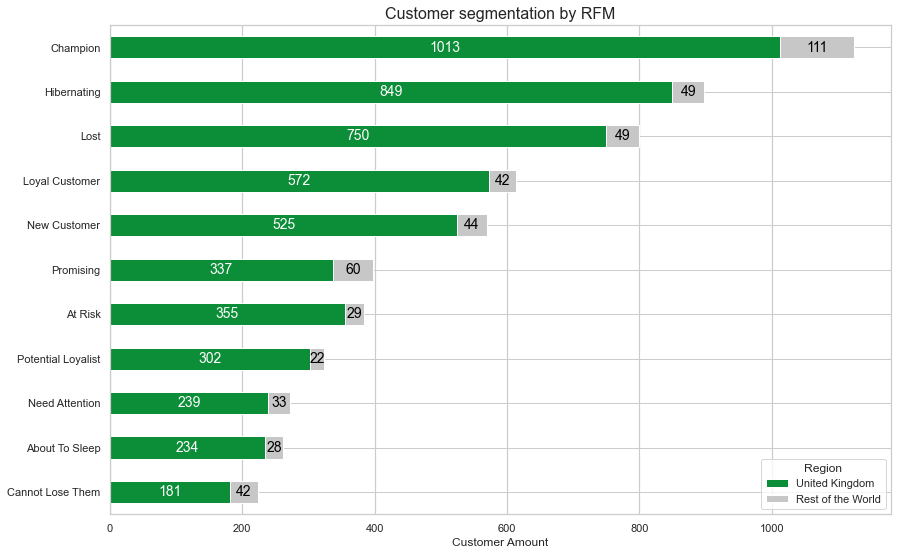

In [46]:
df_pivot_customers = (
    df_customers.groupby(['Category', 'Region'])['Category']
    .count()
    .rename('Count')
    .reset_index()
    .pivot_table(values='Count',
                 index='Category',
                 columns='Region',
                 aggfunc='sum')
)

df_pivot_customers = (
    df_pivot_customers.loc[
        df_pivot_customers
        .sum(axis=1)
        .sort_values(ascending=True)
        .index
    ].iloc[:, ::-1]
)

ax = df_pivot_customers.plot(kind='barh',
                             stacked=True,
                             figsize=(14, 9),
                             color=[green, gray])

plt.xlabel('Customer Amount')
plt.ylabel('')
plt.title('Customer segmentation by RFM', {'fontsize': 16})
plt.bar_label(ax.containers[0], size=14, label_type='center', color='#fcfcfc')
plt.bar_label(ax.containers[1], size=14, label_type='center', color='black')

ax.xaxis.grid(which='major', color='#CCCCCC', linewidth=1.2)

plt.show()

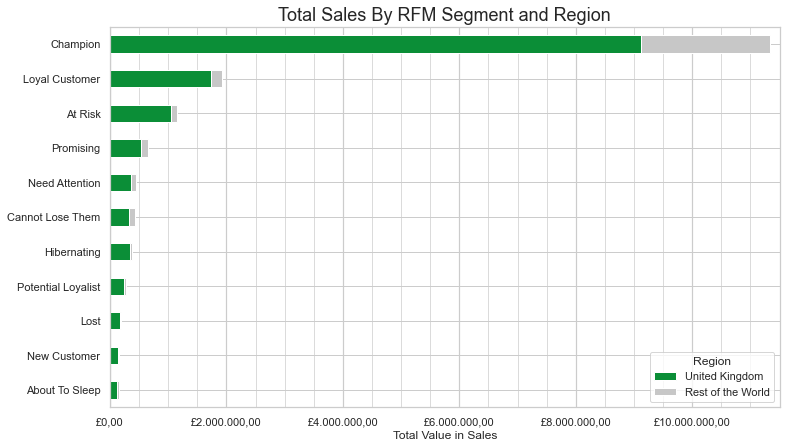

In [47]:
df_pivot_sales = df_sales_region.pivot_table(values='Monetary',
                                             index='Category',
                                             columns='Region',
                                             aggfunc='sum')

df_pivot_sales = (
    df_pivot_sales.loc[
        df_pivot_sales
            .sum(axis=1)
            .sort_values(ascending=True)
            .index
    ].iloc[:, ::-1]
)

ax = df_pivot_sales.plot(kind='barh',
                         stacked=True,
                         figsize=(12, 7),
                         color=[green, gray])

plt.xlabel('Total Value in Sales')
plt.ylabel('')
plt.legend(title='Region')
plt.title('Total Sales By RFM Segment and Region', {'fontsize': 18})

ax.set_xlim(0, 11_500_000)
ax.set_xticks([i * 1_000_000 for i in range(0, 11, 2)])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.xaxis.set_major_formatter(mtick.FuncFormatter(currency_format))

ax.xaxis.grid(which='major', color='#CCCCCC', linewidth=1.2)
ax.xaxis.grid(which='minor', color='#CCCCCC', linewidth=0.7)
ax.minorticks_on()

plt.show()

# Recommendations to the Company

Considering the Pareto Principle — 20% of the causes are responsible for 80% of the effects — then we should evaluate which customer segments cause the most return for the company.

- The Champions category generated £11,339,627.90, representing 66.44% of the total turnover of £17,068,0003.12.
- 1124 customers are classified as Champions, representing around 19.16% of the total amount of customers.
- The second largest category in turnover is the Loyal Customers category, which generated £1,923,798.56, around 11.27% of turnover. It has 614 customers or 10.48% of the total amount of customers.

We can conclude that:
- The main efforts should be concentrated on clients classified as Champions, as only 19.16% of clients were responsible for generating almost 50% of turnover;
- The efforts put into the second largest category need to be well evaluated, as its turnover is low compared to the turnover of the Champions category;
- We can also reinforce that the analysis of customer retention by cohort performs best for customers living in the UK and I recommend that these customers be prioritized.